# Numeros reales

Laboratorio de cálculo diferencial e integral 2.

Prof. Armando Benjamin Cruz Hinojosa (Gory).

In [1]:
import numpy as np

## Tipos numéricos

Los tipos (o clases) numéricos en python son estructuras de datos que tienen un valor numérico asignado. Cuando se habla de un valor numérico, se hace referencia a un elemento del conjunto de los números naturales $\mathbb{N}$, de números enteros $\mathbb{Z}$, de números racionales $\mathbb{Q}$, de números reales $\mathbb{R}$ ó de números complejos $\mathbb{C}$. 

***Definición***: Un tipo de dato numérico de $n$ bits para el conjunto de números $\mathcal{N}\in \{ \mathbb{N}, \mathbb{Z}, \mathbb{Q}, \mathbb{R}, \mathbb{C} \}$, es una función que asignan a cada secuencia de $n$ bits, un único elemento del conjunto $\mathcal{N}$.

Los siguientes son los tipos de datos numéricos por defecto en python.

In [1]:
# Como hacer un tipo de datos
print(type(1))
print(type(1.23))

<class 'int'>
<class 'float'>


### El problema de representación

Las computadoras actuales poseen memoria limitada, así que definir un tipo de dato numérico de $n >> 1$ bits, no valdrá la pena si no es posible almacenar una secuencia de $n$ bits en memoria. Se debe elegir entonces una $n$ no muy grande para poder almacenar varios números en el ordenador y que dicho tamaño sea estandarizado para compartir y resultados entre máquinas.

Así que el dominio de un tipo de dato numérico $T$ es un conjunto finito de las $2^n$ secuencias distintas de bits en memoria, y al ser $T$ inyectivo, los números que pueden ser representados por este tipo son un subconjunto finito de $\mathcal{N}$ de $2^n$ elementos.

***Definición***: Un número $x\in\mathcal{N}$ es *representable* mediante el tipo de dato numérico $T$ si y sólamente sí $x$ está en la imagen de $T$.

El hecho que el subconjunto de números representables por un tipo es finito, implica que **no es posible** definir un tipo numérico que pueda representar al conjunto de los números reales en su totalidad. Sin embargo el tipo de datos usual para el conjunto de números reales es el *float*, y los números representables por este tipo se llaman *Números flotantes* que al conjunto de estos lo denotaremos por $\mathbb{A}$.

La distribución de $\mathbb{A}$ sobre $\mathbb{R}$ se puede apreciar en la siguiente imagen.

***Pregunta*** ¿Cuál es la diferencia de esta imagen con la regla?

In [2]:
# Errores con el punto flotante
print(0.1, 0.2, 0.3)
print(0.1 + 0.2)
print(0.1 + 0.2 - 0.3)

0.1 0.2 0.3
0.30000000000000004
5.551115123125783e-17


### Aproximando reales con flotantes

A pesar de no ser un tipo de dato perfecto, el *float* ha tenido un papel fundamental en la computación científica, la simulación, los gráficos por computadora, y la ingeniería, ramas que han generado productos escenciales en el desarrollo humano.

Los números flotantes $\mathbb{A}$, hoy en día siguen siendo una forma útil de representar y aproximar números reales. A continuación se mostrará este hecho con un algoritmo que calcula una aproximación de $\sqrt{2}$ con un error menor que un $\epsilon>0$ dado. Recuérdese que $\sqrt{2}$ es un número irracional que posee una expansión decimal infinita no periódica.

***Algoritmo***: Aproximación de raiz cuadrada de 2
1. Calcular $x_0$ el mayor entero menor o igual que $\sqrt{2}$, es decir $x_0 = \max\{z \in \mathbb{Z} \lvert z^2 \leq 2\}$. Este entero cumple que $\lvert \sqrt{2}-x_0 \lvert < 1$, osea que la aproximación tiene un error menor a 1.
1. Iterativamente calcular $d_i$ el mayor dígito que cumple $$ x_i^2 = \left( x_0 + \sum_{k=1}^i d_k10^{-k} \right)^2 \leq 2 $$ Esta aproximación tiene un error menor a $10^{-i}$.
1. Continuar el proceso hasta obtener la $n$-ésima aproximación $x_n$ que tenga error $10^{-n} < \epsilon$ 

In [17]:
# Aproximación de raiz de 2
def raiz_2(error=0.001):
    # Calcular x_0
    x_0 = 0
    while x_0**2 <= 2:
        x_0 += 1
    if x_0**2 == 2:
        return x_0
    x_i = x_0 - 1
    exp = 1
    print('Aproximación con error menor que', exp, '=', x_i)

    # Calcular x_i
    while error < exp:
        exp = exp/10
        for d_i in range(1,10):
            x_temp = x_i + d_i*exp
            if x_temp**2 > 2:
                break
        if x_temp**2 == 2:
            return x_temp
        x_i = x_temp - exp
        print('Aproximación con error menor que', exp, ':', x_i)
    return x_i

In [19]:
# Probando la función
raiz_2(error=0.000000002)

Aproximación con error menor que 1 = 1
Aproximación con error menor que 0.1 : 1.4
Aproximación con error menor que 0.01 : 1.41
Aproximación con error menor que 0.001 : 1.414
Aproximación con error menor que 0.0001 : 1.4142
Aproximación con error menor que 1e-05 : 1.4142099999999997
Aproximación con error menor que 1.0000000000000002e-06 : 1.4142129999999997
Aproximación con error menor que 1.0000000000000002e-07 : 1.4142134999999996
Aproximación con error menor que 1.0000000000000002e-08 : 1.4142135599999996
Aproximación con error menor que 1.0000000000000003e-09 : 1.4142135619999996


1.4142135619999996

In [5]:
import math
math.sqrt(2) - raiz_2(0.00001)

Aproximación con error menor que 1 = 1
Aproximación con error menor que 0.1 : 1.4
Aproximación con error menor que 0.01 : 1.41
Aproximación con error menor que 0.001 : 1.414
Aproximación con error menor que 0.0001 : 1.4142
Aproximación con error menor que 1e-05 : 1.4142099999999997


3.5623730954004174e-06

## Funciones de $\mathbb{R}$ en $\mathbb{R}$

De la misma forma que es posible representar valores numéricos de distintas formas, también existen estructuras de datos variadas para representar funciones de los reales en sí mismos. El tipo de codificación que se elija dependerá del subconjunto de funciones que se esté estudiando.

### Funciones de $\mathbb{A}$ en $\mathbb{A}$.

Python nos permite definir funciones que tomen un parámetro de tipo _float_ y que regrese otro dato del mismo tipo después de ejecutar un bloque de código llamado cuerpo. 

In [37]:
# Funciones de A en A
def f(x):
    return -(x+1)**2 + 80

def g(x):
    return np.sin(x)/3

#### Llamar a una función

In [12]:
print('Llamada directa')
print(f'f evaluada en 3.1416 vale {f(3.1416)}')

Llamada directa
f evaluada en 3.1416 vale {f(3.1416)}
f evaluada en 3.1416 vale 62.847149439999995


In [19]:
print('Evaluar una lista:')
dominio = [1, 2.55, 3.1416, 7.77]

for x in dominio:
    print(f'f evaluada en {x} vale {f(x)}')

resultados = list(
    map(f, dominio)
)
print(resultados)

resultados2 = [f(x) for x in dominio]
print(resultados2)

Evaluar una lista:
f evaluada en 1 vale 76
f evaluada en 2.55 vale 67.39750000000001
f evaluada en 3.1416 vale 62.847149439999995
f evaluada en 7.77 vale 3.0871000000000066
[76, 67.39750000000001, 62.847149439999995, 3.0871000000000066]
[76, 67.39750000000001, 62.847149439999995, 3.0871000000000066]


In [44]:
print('Evaluar numpy array')
dominio = np.array([1, 2.55, 3.1416, 7.77])
resultados = f(dominio)

print(resultados)
print(resultados[0])

Evaluar numpy array
[76.         67.3975     62.84714944  3.0871    ]
76.0


#### Composición de funciones

In [46]:
composicion = lambda x: g(f(x))

composicion(4)

-0.33325172445287327

Este tipo de funciones son buenas para representar funciones continuas que puedan ser escritas algorítmicamente. Debido al siguiente teorema.

***Teorema***: Sean $f$ y $g$ funciones continuas de $\mathbb{R}$ en $\mathbb{R}$. Si $f(q) = g(q), \forall q\in\mathbb{Q}$ entonces $f = g$.

***Demostración***: Considérese la función continua $h = f-g$ que se anula en los racionales. Por densidad de los números racionales en los reales, para cualquier $r\in\mathbb{R}$ existe una secuencia $\{q_i\}_{\mathbb{N}}$ de racionales tales que $\lim_{n\rightarrow\infty}q_i = r$, y por continuidad de h se cumple que $$ 0 = \lim_{n\rightarrow\infty}h(q_i) = h(r)$$ Así que $h$ es la función constante 0, demostrando que $f = g \;\blacksquare$



### Polinomios con computación simbólica

La computación simbólica o álgebra computacional, es la rama de las ciencias de la computación que estudia la manipulación algoritmica de expresiones matemáticas y su implementación en software.

In [9]:
import sympy

x = sympy.symbols('x')
p = x**2 - 2*x +1
Dp = sympy.diff(p)

print('p:', p)
print('p factorizado:', sympy.factor(p))
print('Dp:', Dp)
print('p * Dp:', p*Dp)
print('p * Dp expandido:', sympy.expand(p*Dp))


p: x**2 - 2*x + 1
p factorizado: (x - 1)**2
Dp: 2*x - 2
p * Dp: (2*x - 2)*(x**2 - 2*x + 1)
p * Dp expandido: 2*x**3 - 6*x**2 + 6*x - 2


### Graficación de funciones

Para graficar una función de $\mathbb{A}$ en $\mathbb{A}$ se puede usar la libreria matplotlib.

In [10]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

Text(0, 0.5, 'Distancia al punto de equilibro')

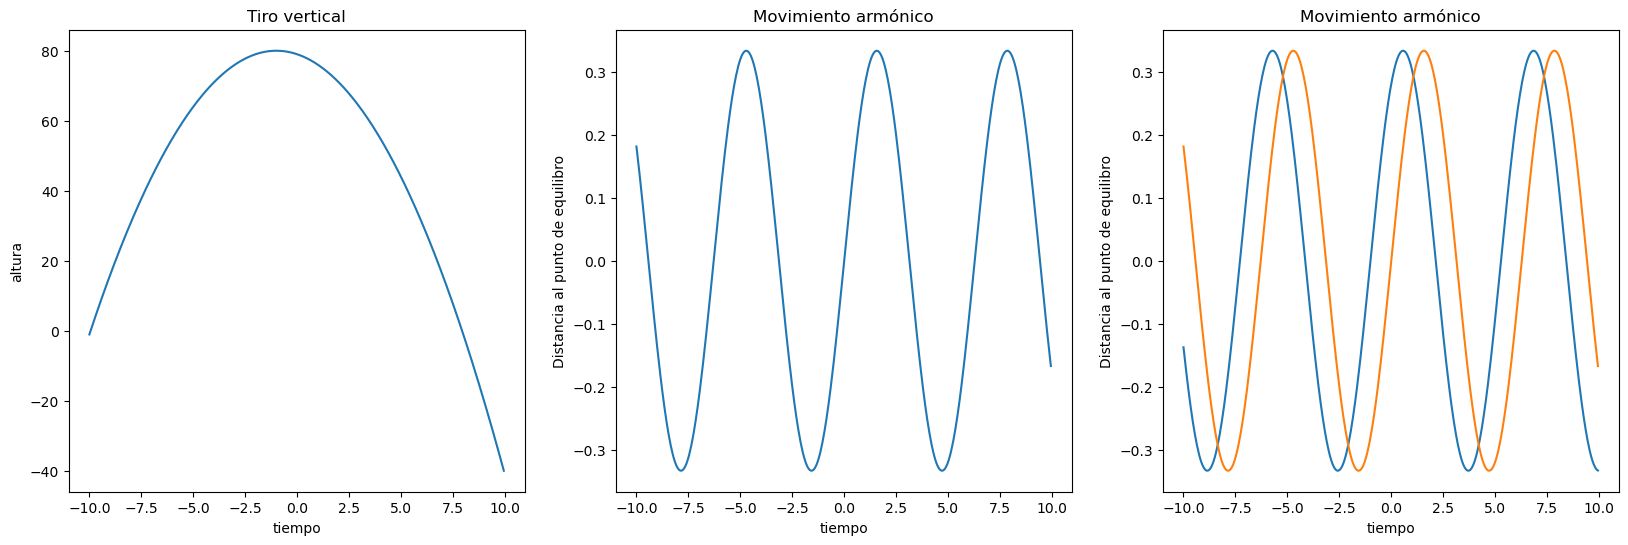

In [11]:
# Graficando f y g

# Evaluar el dominio con las funciones
x = np.arange(-10, 10, 0.05)
fx = list(map(f, x))
gx = g(x)
hx = g(x+1)

# Graficar
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
# Izquierda
ax[0].plot(x,fx)
ax[0].set_title('Tiro vertical')
ax[0].set_xlabel('tiempo')
ax[0].set_ylabel('altura')
# Centro
ax[1].plot(x,gx)
ax[1].set_title('Movimiento armónico')
ax[1].set_xlabel('tiempo')
ax[1].set_ylabel('Distancia al punto de equilibro')
# Derecha
ax[2].plot(x,hx)
ax[2].plot(x,gx)
ax[2].set_title('Movimiento armónico')
ax[2].set_xlabel('tiempo')
ax[2].set_ylabel('Distancia al punto de equilibro')

## Límites

Recordemos la caracterización del límite una función por sucesiones.

**Teorema**: Sean $f: \mathbb{R}$ \rightarrow \mathbb{R}$ y $a \in [a,b]$. El límite $\lim_{x\rightarrow a}f(x)$ existe si y solamente si para toda sucesión $\{s_n\}_{\mathbb{N}}$ de reales que converge a $a$, la sucesión $\{f(s_n)\}_{\mathbb{N}}$ de imágenes bajo $f$, también es convergente. Además el límite de las sucesiones coincide con el límite de la función.

Lo poderoso de esta caracterización es que para comprobar la existencia de un límite de funciones, basta con verificar que *todas* las sucesiones de elementos en el dominio que convergen al punto límite, sean convergentes. Aunque no es posible hacer el cálculo para cada sucesión (hay infinitas de ellas), si calculamos el límite de una de estas sucesiones y es convergente, el límite de la función debe ser igual al límite calculado, que nos da información suficiente para formular una hipótesis.

El siguiente algoritmo aproxima el límite de dos sucesiones particulares

***Algoritmo***: Entradas $\leftarrow$ ($f$ la función a calcular el límite, $a$ el punto límite)
1. Calcular los primeros $n$ términos de la sucesión $\epsilon = \{2^{-n}\}_{\mathbb{N}}$ que es convergente a 0.
2. Usar esta sucesión para generar otras dos sucesiones, $\mathcal{I} = a - \epsilon$ y $\mathcal{D} = a + \epsilon$ ambas convergentes a $a$.
3. A partir de estas sucesiones obtener las sucesiones de imágenes $f(\mathcal{I})$ y $f(\mathcal{D})$ y la sucesión de diferencias $\delta = \lvert f(\mathcal{I}) - f(\mathcal{D}) \lvert$.
4. Si la sucesión de diferencias tiende a 0 entonces $f(\mathcal{I})$ y $f(\mathcal{D})$ son convergentes y convergen al mismo límite.

In [12]:
# Cálculo de límite
def limite(f, a):
    n = np.arange(20)
    epsilon = 1/ 2 ** n
    izquierda = a - epsilon
    derecha = a + epsilon
    f_i = f(izquierda)
    f_d = f(derecha)

    promedio = (f_i + f_d)/2
    delta = np.abs(f_i - f_d)

    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    # Imagenes
    ax[0].plot(n, f_i, label='f(I)')
    ax[0].plot(n, f_d, label='f(D)')
    ax[0].plot(n, promedio, label='L')
    ax[0].set_title('Sucesiones')
    ax[0].set_xlabel('N')
    ax[0].set_ylabel('Imagen')
    ax[0].legend()
    # Diferencia
    ax[1].plot(n, delta)
    ax[1].set_title('Diferencia')
    ax[1].set_xlabel('N')
    ax[1].set_ylabel('Delta')

    return promedio[-1]
    

### Funcionamiento del algoritmo

Limite: 0.0


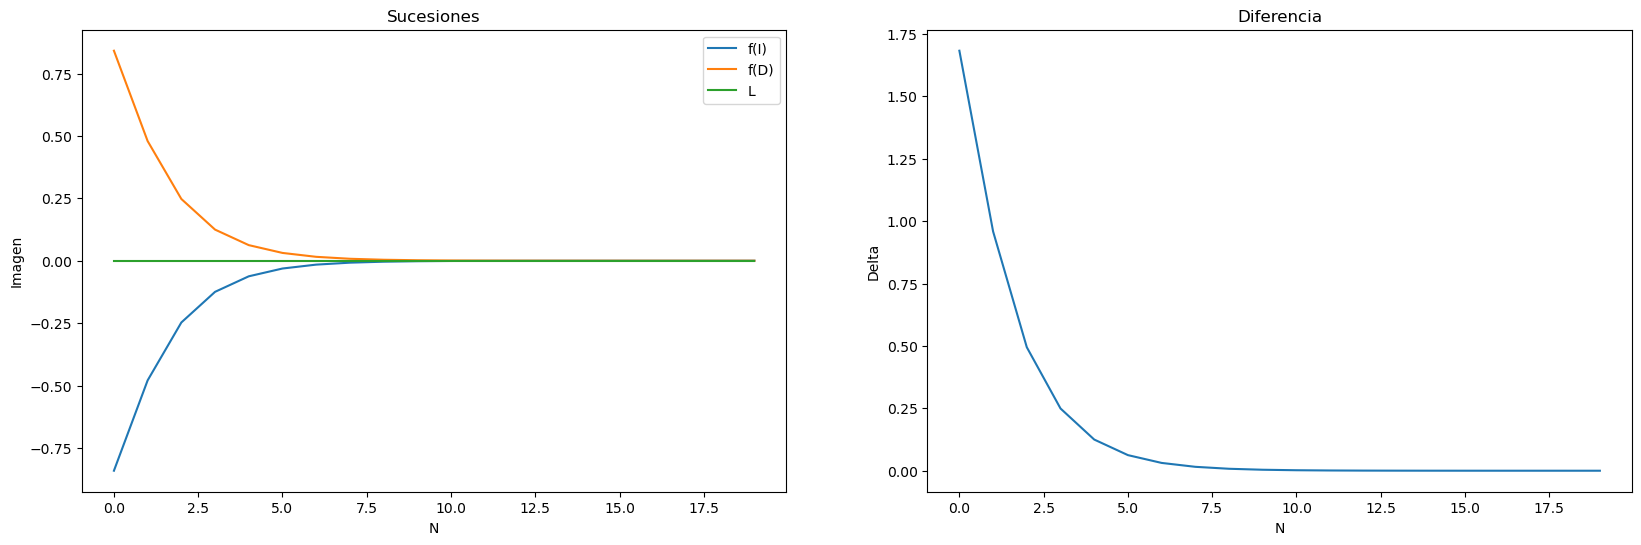

In [13]:
#caso 1
def f1(x):
    return np.sin(x)

lim = limite(f1, 0)
print('Limite:', lim)

Limite: 0.9999999999993937


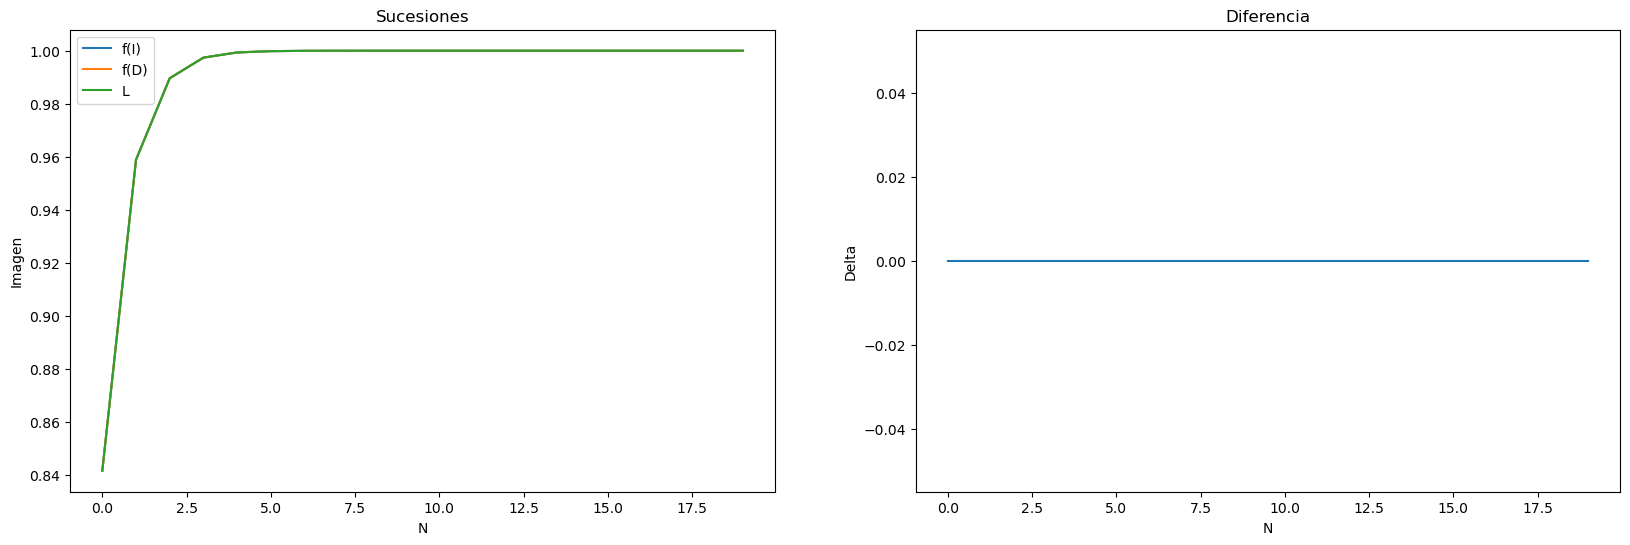

In [14]:
#caso 2
def f2(x):
    return np.sin(x)/x

lim = limite(f2, 0)
print('Limite:', lim)

Limite: 0.0


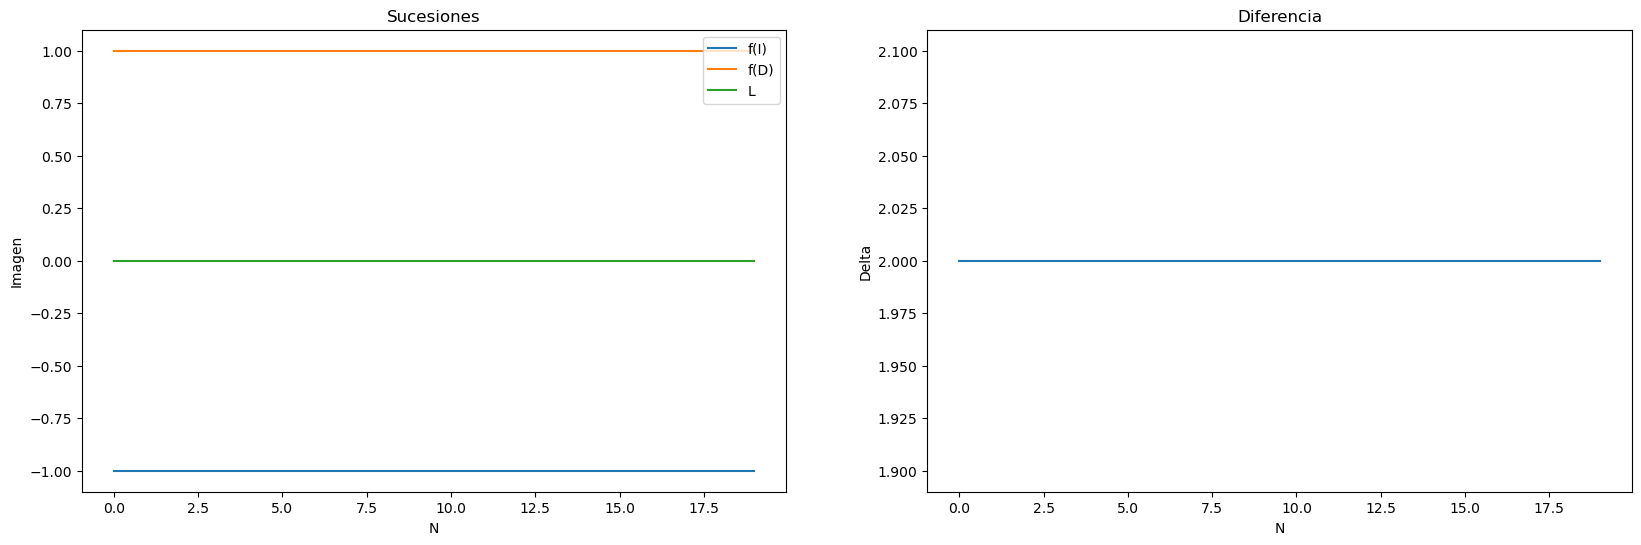

In [15]:
#caso 3
def f3(x):
    return np.abs(x)/x

lim = limite(f3, 0)
print('Limite:', lim)